# Collect Investments Data Using Alpaca: SPY (stocks) and QQQ

In [519]:
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
from alpaca_trade_api.rest import REST, TimeFrame
import os
import pandas as pd
from MCForecastTools import MCSimulation
import requests
import datetime as dt
import streamlit as st

In [491]:
btc_url = 'https://api.alternative.me/v2/'
eth_url = 'https://api.alternative.me/v2/'


ETH_amount = 0.00012
BTC_amount = 0.00215

In [492]:
my_btc = requests.get(btc_url + 'ticker/1/').json()
my_btc = pd.json_normalize(my_btc)
my_btc = my_btc.set_index('data.1.name')
my_btc_copy = my_btc['data.1.quotes.USD.price'].copy(deep=False)
my_btc = my_btc['data.1.quotes.USD.price'][0]
my_btc = float(my_btc)

In [493]:
# Compute current value of my crpto
my_btc_value = my_btc * (BTC_amount)

In [494]:
# Compute current value of my crpto

my_eth_value = my_eth * (ETH_amount)
my_eth_value

# Print current crypto wallet balance
my_crypto_wallet = my_btc_value + my_eth_value
my_crypto_wallet = int(my_crypto_wallet)



In [495]:
my_eth = requests.get(eth_url + 'ticker/1027/').json()
my_eth = pd.json_normalize(my_eth)
my_eth = my_eth.set_index('data.1027.name')
my_eth_copy = my_eth['data.1027.quotes.USD.price'].copy(deep=False)
my_eth = my_eth['data.1027.quotes.USD.price'][0]
my_eth = float(my_eth)
my_eth



1123.5

In [496]:
def alpaca_caller(ticker, start_date, end_date):
    
    """ esta herramienta te permite accedar a la data de los tikers, los parametros son nombre del ticker, la fecha de inicio, y l afecha de finalisado, todo con comillas"""
    load_dotenv("key.env")
    alpaca_api_key = os.getenv("ALPACA_API_KEY")
    alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
  
    
    """api = tradeapi.REST(
        alpaca_api_key,
        alpaca_secret_key,
        base_URL,
        api_version = "V2"
"""
    api = REST(
        key_id=alpaca_api_key,
        secret_key=alpaca_secret_key,
        base_url="https://paper-api.alpaca.2ymarkets"
    )

    ticker = ticker
    timeframe = "1D"
    start_date = pd.Timestamp(start_date, tz="America/New_York").isoformat()
    end_date = pd.Timestamp(end_date, tz="America/New_York").isoformat()
    ticker_data = api.get_bars(ticker, TimeFrame.Hour, start_date, end_date, adjustment='raw').df
    return ticker_data

In [497]:
qqq_amount = [10]
spy_amount = [11]



tickers = 'SPY', 'QQQ'



tickers_df = alpaca_caller(tickers,"2020-01-01", "2022-06-16")

In [498]:
# Pick AGG and SPY .close prices
tickers_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-01-02 09:00:00+00:00,213.98,214.26,213.95,214.2200,53394,131,214.118446,QQQ
2020-01-02 10:00:00+00:00,214.24,214.37,214.24,214.3200,24332,61,214.314276,QQQ
2020-01-02 11:00:00+00:00,214.30,214.30,214.06,214.1500,13615,48,214.154732,QQQ
2020-01-02 12:00:00+00:00,214.07,214.34,214.06,214.2900,83918,303,214.189485,QQQ
2020-01-02 13:00:00+00:00,214.15,214.62,213.50,214.5502,213646,757,214.461111,QQQ
...,...,...,...,...,...,...,...,...
2022-06-15 19:00:00+00:00,378.18,383.90,377.85,379.1300,33709705,266468,379.368149,SPY
2022-06-15 20:00:00+00:00,379.13,379.48,378.25,379.0300,11529742,9093,378.735412,SPY
2022-06-15 21:00:00+00:00,379.21,379.74,379.03,379.7000,844104,1402,379.270169,SPY


In [499]:
grouped = tickers_df.groupby(tickers_df.symbol)
spy_new = grouped.get_group("SPY")
spy_new

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-01-02 09:00:00+00:00,323.5200,323.86,323.52,323.83,28435,101,323.695710,SPY
2020-01-02 10:00:00+00:00,323.8200,323.98,323.82,323.91,15239,65,323.930348,SPY
2020-01-02 11:00:00+00:00,323.9400,323.94,323.63,323.63,17868,78,323.727727,SPY
2020-01-02 12:00:00+00:00,323.6100,323.85,323.61,323.85,64861,393,323.744152,SPY
2020-01-02 13:00:00+00:00,323.6899,324.08,322.83,324.03,366678,1178,323.912872,SPY
...,...,...,...,...,...,...,...,...
2022-06-15 19:00:00+00:00,378.1800,383.90,377.85,379.13,33709705,266468,379.368149,SPY
2022-06-15 20:00:00+00:00,379.1300,379.48,378.25,379.03,11529742,9093,378.735412,SPY
2022-06-15 21:00:00+00:00,379.2100,379.74,379.03,379.70,844104,1402,379.270169,SPY


In [500]:
qqq_new = grouped.get_group("QQQ")
qqq_new

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-01-02 09:00:00+00:00,213.98,214.26,213.95,214.2200,53394,131,214.118446,QQQ
2020-01-02 10:00:00+00:00,214.24,214.37,214.24,214.3200,24332,61,214.314276,QQQ
2020-01-02 11:00:00+00:00,214.30,214.30,214.06,214.1500,13615,48,214.154732,QQQ
2020-01-02 12:00:00+00:00,214.07,214.34,214.06,214.2900,83918,303,214.189485,QQQ
2020-01-02 13:00:00+00:00,214.15,214.62,213.50,214.5502,213646,757,214.461111,QQQ
...,...,...,...,...,...,...,...,...
2022-06-15 19:00:00+00:00,281.95,286.83,281.58,282.8750,21369921,185735,283.507128,QQQ
2022-06-15 20:00:00+00:00,282.87,283.06,281.95,282.7200,3198499,6503,282.744912,QQQ
2022-06-15 21:00:00+00:00,282.72,283.74,282.69,283.6600,1020047,3275,282.883915,QQQ


In [501]:
# Pick AGG and SPY .close prices

qqq_daily = qqq_new['close']
spy_daily = spy_new['close']


In [502]:
qqq_close_df = pd.DataFrame(qqq_daily)
spy_close_df = pd.DataFrame(spy_daily)


In [503]:
qqq_close_price = qqq_new['close'][-1]
spy_close_price = spy_new['close'][-1]

In [504]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${qqq_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $285.16
Current SPY closing price: $381.71


<AxesSubplot:xlabel='timestamp'>

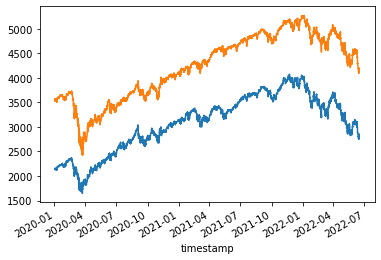

In [505]:
# Compute the current value of shares
my_qqq_value = qqq_close_df.dot(qqq_amount)
my_spy_value = spy_close_df.dot(spy_amount)

my_qqq_value.plot()
my_spy_value.plot()

In [506]:
copy_qqq_value = my_qqq_value.copy(deep=False)
copy_spy_value = my_spy_value.copy(deep=False)

In [507]:
my_qqq_value = int(my_qqq_value[-1])
my_spy_value = int(my_spy_value[-1])
stocks_df_joined = pd.concat([qqq_daily, spy_daily], axis='columns', join='outer')

In [508]:
# Print current value of shares

my_stock_wallet = my_qqq_value +  my_spy_value
my_stock_wallet = (my_stock_wallet)

print(f"The current value of your {spy_amount} SPY shares is ${my_spy_value:0.2f}")

print(f"The current value of your {qqq_amount} AGG shares is ${my_qqq_value:0.2f}")
print('--------------------------------------------------------------------------')
print(f"The current value of your stock-WALLET is ${my_stock_wallet}")


print(f"The current value of your {BTC_amount} BTC shares is ${my_btc_value:0.2f}")
print(f"The current value of your {ETH_amount} ETH shares is ${my_eth_value:0.2f}")

print('--------------------------------------------------------------------------')

print(f"The current value of your crypto-WALLET is ${my_crypto_wallet}")

The current value of your [11] SPY shares is $4198.00
The current value of your [10] AGG shares is $2851.00
--------------------------------------------------------------------------
The current value of your stock-WALLET is $7049
The current value of your 0.00215 BTC shares is $44.34
The current value of your 0.00012 ETH shares is $0.13
--------------------------------------------------------------------------
The current value of your crypto-WALLET is $44


In [509]:
# Set monthly household income
monthly_income = 3000


# Consolidate financial assets data

join_dfs = [
my_qqq_value + my_spy_value,
my_btc_value + my_eth_value
]

value_joined_dfs = (my_qqq_value + my_spy_value + my_btc_value + my_eth_value)

# Create savings DataFrame

df_savings = pd.DataFrame(join_dfs, index=["stocks", "crypto"])


# Display savings DataFrame
display(df_savings)


,0
stocks,7049.00000
crypto,44.47642


array([<AxesSubplot:ylabel='0'>], dtype=object)

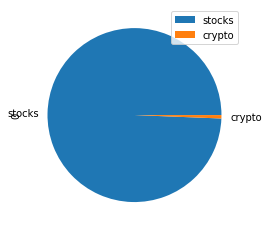

In [510]:
# Plot savings pie chart
df_savings.plot(kind='pie',subplots=True)

In [511]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
monthly_income

3000

In [512]:
# Calculate total amount of savings
if value_joined_dfs > emergency_fund or value_joined_dfs == emergency_fund:
    print(f"congrats you emergency fund is healthy!!!")
else:
    print(f"your emergency fund needs work")


your emergency fund needs work


In [513]:
## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [514]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen

# Get 5 years' worth of historical data for SPY and AGG
tickers = ["SPY", "BATS"]





# Display sample data
portafolio_30y_df = alpaca_caller(tickers,"1992-01-01", "2022-06-16")

In [515]:
portafolio_30y_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-04-15 14:00:00+00:00,22.8800,23.3900,22.40,22.78,9378139,28005,22.889998,BATS
2016-04-15 15:00:00+00:00,22.7800,23.0500,22.51,22.81,1232044,6154,22.747474,BATS
2016-04-15 16:00:00+00:00,22.8100,23.2002,22.75,22.92,645658,3155,22.871454,BATS
2016-04-15 17:00:00+00:00,22.8792,22.9300,22.55,22.78,375223,2359,22.802507,BATS
2016-04-15 18:00:00+00:00,22.7900,22.8500,22.60,22.75,449775,2655,22.703488,BATS
...,...,...,...,...,...,...,...,...
2022-06-15 19:00:00+00:00,378.1800,383.9000,377.85,379.13,33709705,266468,379.368149,SPY
2022-06-15 20:00:00+00:00,379.1300,379.4800,378.25,379.03,11529742,9093,378.735412,SPY
2022-06-15 21:00:00+00:00,379.2100,379.7400,379.03,379.70,844104,1402,379.270169,SPY


IndexError: Too many levels: Index has only 1 level, not 2

IndexError: Too many levels: Index has only 1 level, not 2